In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r"C:\Users\asus\Downloads\titanic dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data1=data.describe(include='all')

In [7]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
for value in ['Age']:
    data[value].fillna(data1[value][4],inplace=True)

In [9]:
for value in ['Cabin','Embarked']:
    data[value].fillna(data1[value][2],inplace=True)

In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
data.shape

(891, 12)

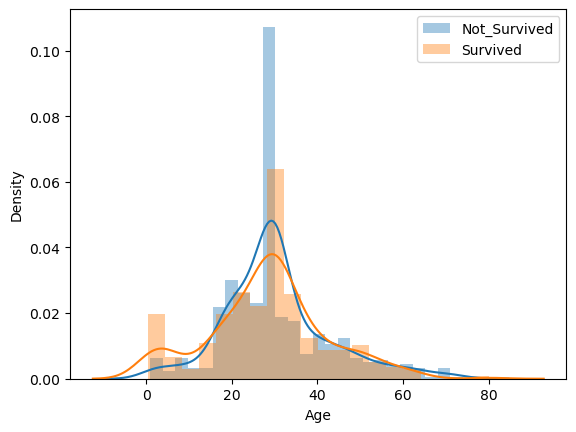

In [14]:
sns.distplot(data.Age[data.Survived==0],label='Not_Survived')
sns.distplot(data.Age[data.Survived==1],label='Survived')
plt.legend()
plt.show()

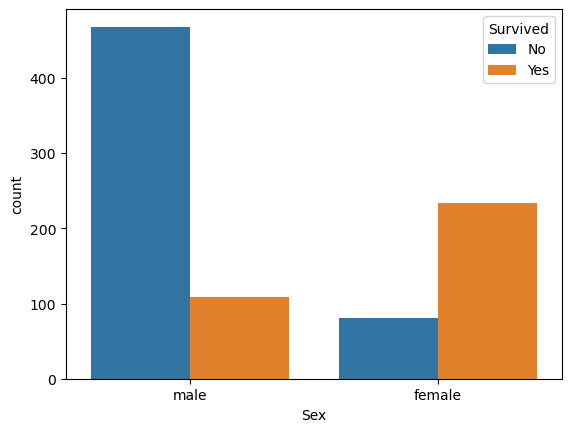

In [33]:
sns.countplot(x=data.Sex,hue=data.Survived)
plt.legend(title='Survived', labels=['No', 'Yes'])

<Axes: xlabel='SibSp', ylabel='count'>

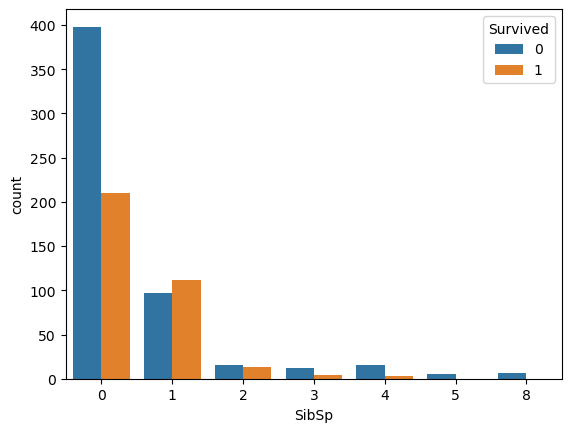

In [31]:
sns.countplot(x=data.SibSp,hue=data.Survived)

<Axes: xlabel='Pclass', ylabel='count'>

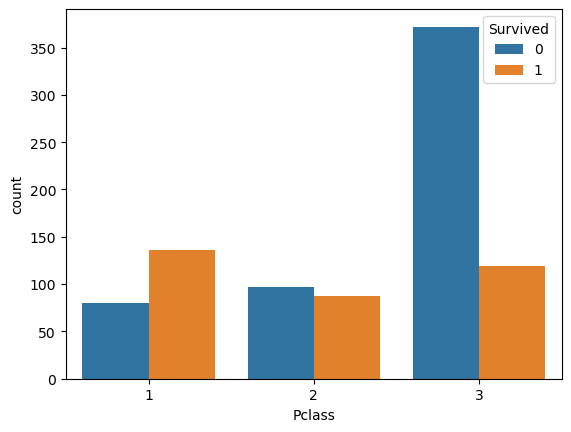

In [32]:
sns.countplot(x=data.Pclass,hue=data.Survived)

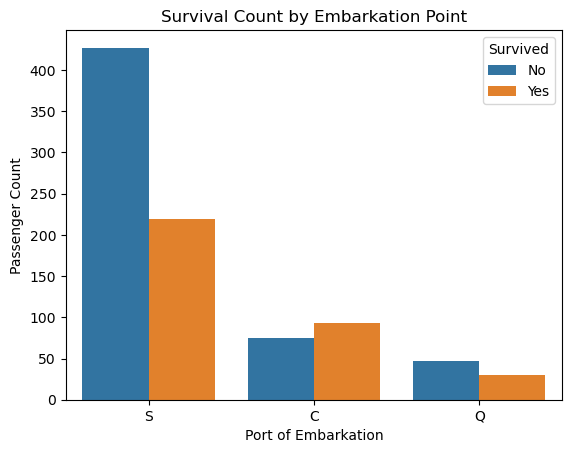

In [34]:
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title("Survival Count by Embarkation Point")
plt.xlabel("Port of Embarkation")
plt.ylabel("Passenger Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [35]:
data1=data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [36]:
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [37]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1.Pclass=le.fit_transform(data1.Pclass)
le1=LabelEncoder()
data1.Sex=le1.fit_transform(data1.Sex)
le2=LabelEncoder()
data1.Embarked=le2.fit_transform(data1.Embarked)

In [38]:
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.000000,1,0,7.2500,2
1,1,0,0,38.000000,1,0,71.2833,0
2,1,2,0,26.000000,0,0,7.9250,2
3,1,0,0,35.000000,1,0,53.1000,2
4,0,2,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,1,1,27.000000,0,0,13.0000,2
887,1,0,0,19.000000,0,0,30.0000,2
888,0,2,0,29.699118,1,2,23.4500,2
889,1,0,1,26.000000,0,0,30.0000,0


In [39]:
data2=data1.corr()

<Axes: >

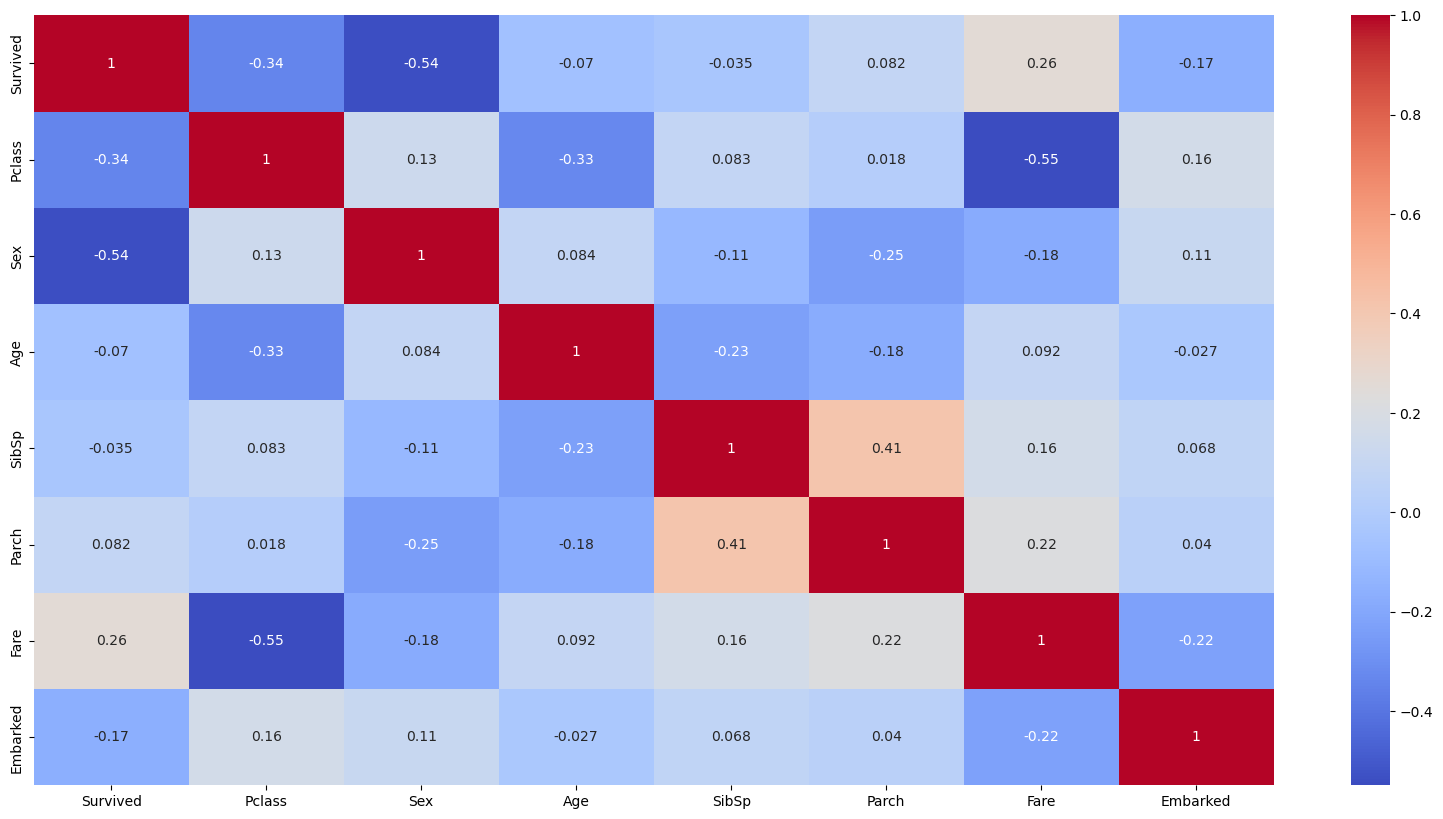

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(data2,annot=True,cmap='coolwarm')

In [46]:
data1.Sex.unique()

array([1, 0])

In [47]:
le1.inverse_transform([1,0])

array(['male', 'female'], dtype=object)

# Regration:-
Linear Regression
,Polynomial 
,Lasso
,Ridge 
,Random
,Suport
,Decission
# Classification:-
Logistic
,Naive
,SVM
,KNN
,Decision Making
,Random
,Ensemble
,AdaBoost
,Gradeient Boat